In [ ]:
import datetime as dt
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from define.randchans import RandomPauliChannel
from define.QECCLfid import uncorrectable as uc
from define import qcode as qc
from define import fnames as fn
from define import globalvars as gv
import matplotlib
matplotlib.use("Agg")
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
qcode = qc.QuantumErrorCorrectingCode("Steane")
qc.Load(qcode)

In [ ]:
mu = np.mean(qcode.weightdist[qcode.PauliCorrectableIndices])/2
np.random.normal(mu,0.5)

In [ ]:
# plt.plot(np.arange(8),poisson.pmf(np.arange(8), 0),0.1**np.arange(10),marker="o",linestyle="None")

In [ ]:
# probs = poisson.pmf(qcode.weightdist, np.abs(np.random.normal(mu,mu/3)))
# plt.plot(np.sort(qcode.weightdist), probs[np.argsort(qcode.weightdist)],marker="o",linestyle="None")
# plt.plot(np.sort(qcode.weightdist), (1/7)**np.sort(qcode.weightdist),marker="x",linestyle="None")
# plt.yscale('log')

In [ ]:
errdist = RandomPauliChannel({"method":1, "mu":mu, "weightdist":qcode.weightdist})

In [ ]:
infid = 0.2
errdist[0] = 1 - infid
errdist[1:] = infid * errdist[1:]/np.sum(errdist[1:])

In [ ]:
errdist

In [ ]:
PauliDistributionPlot(errdist, qcode, nreps=5, max_weight=3)

In [ ]:
for w in range(np.max(qcode.weightdist)+1):
    print("Total probability of weight {} errors = {}:\n{}".format(w, np.sum(errdist[qcode.weightdist==w]), errdist[qcode.weightdist==w]))

In [ ]:
import numpy as np
from define import qcode as qc
from define.QECCLfid import uncorrectable as uc
from analyze.plots import PauliDistributionPlot

In [ ]:
qcode = qc.QuantumErrorCorrectingCode("Steane")
qc.Load(qcode)
qc.PrepareSyndromeLookUp(qcode)

In [ ]:
q1 = 0.8; q2 = 0.2; infid = 0.1; n = qcode.N
single_qubit_errors = np.array([1 - infid, infid/3, infid/3, infid/3], dtype=np.double)

In [ ]:
iid_error_dist = uc.GetErrorProbabilities(qcode.PauliOperatorsLST, single_qubit_errors, 0)
full_process_infid = 1 - iid_error_dist[0]
print("Sum of IID error probabilities = {}, Infidelity = {}.".format(np.sum(iid_error_dist), full_process_infid))

In [ ]:
n_two_qubit_errors = np.int(0.1 * qcode.group_by_weight[2].size)
two_qubit_errors = np.random.choice(qcode.group_by_weight[2], size=n_two_qubit_errors)

In [ ]:
corr_error_dist = np.zeros(iid_error_dist.size, dtype=np.double)
corr_error_dist[two_qubit_errors] = np.abs(np.random.normal(0.1 * 4**n * full_process_infid, 0.1 * 4**n * full_process_infid, size=(n_two_qubit_errors,)))
corr_error_dist[0] = 1 - full_process_infid
corr_error_dist[two_qubit_errors] = full_process_infid * corr_error_dist[two_qubit_errors]/np.sum(corr_error_dist[two_qubit_errors])
corr_error_dist = corr_error_dist/np.sum(corr_error_dist)

In [ ]:
print("Sum of CORR error probabilities = {}, Infidelity = {}".format(np.sum(corr_error_dist), 1-corr_error_dist[0]))

In [ ]:
pauli_error_dist = q1 * iid_error_dist + q2 * corr_error_dist

In [ ]:
PauliDistributionPlot(qcode, pauli_error_dist, nreps=5, max_weight=3,outdir="./../../temp/", channel="linear_sum")

In [ ]:
chi_from_file = np.load("/Users/pavi/Documents/chbank/20_05_2020_11_07_46/physical/raw_up_6.5.npy")[1,:].reshape([4,4])

In [ ]:
chi_from_file

In [ ]:
ptm_from_file = np.load("/Users/pavi/Documents/chbank/20_05_2020_11_07_46/physical/up_6.5.npy")[1,:].reshape([4,4])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def normalization(p, n, g):
    return (1 + g*p + np.power(p,3)/(1-p)*(1-np.power(p,n-2)))

In [38]:
nq = 7
g = 0.1
p = 0.1
corr_probs = [(1-p)/normalization(1-p, nq, g)] + [p/normalization(p, nq, g), g*p/normalization(p, nq, g)] + [np.power(p,k)/normalization(p, nq, g) for k in range(3,nq+1)]

In [39]:
iid_probs = [np.power(1-p,nq)] + [np.power(p,k)*np.power(1-p, nq-k) for k in range(1, nq+1)]

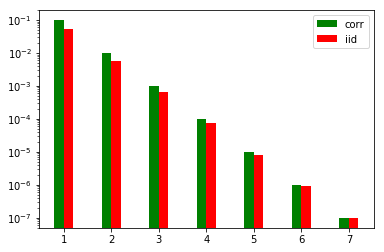

In [40]:
#fig = plt.figure()
X = np.arange(nq+1)
plt.bar(X[1:]-0.1, corr_probs[1:], color="g", width=0.2, align="center", label="corr")
plt.bar(X[1:]+0.1, iid_probs[1:], color="r", width=0.2, align="center", label= "iid")
plt.yscale("log")
plt.legend(loc=0)
plt.show()

In [ ]:
def normalization_agm(p, n):
    return 1 - p - (np.power(p, n+1)*(n+1) - p - n * np.power(p, n+2))/np.power(1-p, 2)

In [ ]:
corr_probs_agm = [(1-p)/normalization_agm(1-p, nq)] + [np.power(p,k)/normalization_agm(p, nq) for k in range(1,nq+1)]

In [ ]:
#fig = plt.figure()
X = np.arange(nq+1)
plt.bar(X-0.1, corr_probs_agm, color="g", width=0.2, align="center", label="corr")
plt.bar(X+0.1, iid_probs, color="r", width=0.2, align="center", label= "iid")
plt.yscale("log")
plt.legend(loc=0)
plt.show()

In [ ]:
def normalization_gm(p, n):
    return (1+p/(1-p)*(1-np.power(p,n)))

In [18]:
import numpy as np
from define.QECCLfid.ptm import get_Pauli_tensor
from define.QECCLfid.utils import Kron
from define import globalvars as gv
from define import qcode as qc

In [19]:
qcode = qc.QuantumErrorCorrectingCode("Steane")
qc.Load(qcode)

In [17]:
L = [1,1,3,2,1]
np.allclose(get_Pauli_tensor(L).reshape(2**len(L),2**len(L)), Kron(*gv.Pauli[L]))

True

In [27]:
nstabs = 64
nlogs = 4
# nstabs * nlogs
qc.GetOperatorsForTLSIndex(qcode, range(64, 66))

array([[0, 0, 0, 0, 1, 1, 1],
       [3, 0, 3, 0, 2, 1, 2]])

In [28]:
qc.GenerateGroup(qcode.L)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 3, 3],
       [0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 2, 2, 2]], dtype=int8)

In [29]:
qcode.L

array([[0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 3, 3, 3]], dtype=int8)

In [30]:
qcode.S

array([[1, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 0, 1],
       [3, 3, 3, 3, 0, 0, 0],
       [3, 3, 0, 0, 3, 3, 0],
       [3, 0, 3, 0, 3, 0, 3]], dtype=int8)